# About
[Purpose for this notebook]

Bi-LSTMs are a type of RNNs, and as such, have memory which can store temporal information available in time series data. 

# LSTM

# Global Parameters

In [1]:
name_prefix = "Multivariate-CNN"

# Libraries

In [2]:
%run "/home/cesar/Python_NBs/HDL_Project/HDL_Project/global_fv.ipynb"

In [3]:
import os
import glob
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Data
from sklearn.model_selection import train_test_split

# DL Model
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
from keras.layers.convolutional import MaxPooling1D

# Optimizer
from tensorflow.keras.optimizers import Adam

# Plotting
import matplotlib.pyplot as plt

# Early stopping
from tensorflow.keras.callbacks import EarlyStopping

# Checkpoint
from keras.callbacks import ModelCheckpoint

# User-Defined Functions

In [4]:
def design_model(n_steps, lr, n_features):
    """
    n_steps: Number of steps
    n_features: Number of features
    lr: Learning rate
    """
    model = Sequential(name = "Multivariate-CNN-model")
    
    # Number of neurons (nodes) are just about greater than the number of features.
    # Rule of thumb is for number of neurons to be about 2/3 of the input    
    num_neurons = 8 #int(np.ceil(n_features *2 /3))
    
    # CNN Layer
    model.add(Conv1D(num_neurons, 1, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D())
    model.add(Flatten())    
    
    # Output layer with one neuron to a model instance (to return one output)
    model.add(Dense(1, kernel_initializer='normal',activation='linear'))
    
    # Regularization prevents the learning process to completely fit the model to the training data which can lead to overfitting.
    # The most common regularization method is dropout.
    #model.add(layers.Dropout(0.1))    
    
    # Optimizer
    opt = Adam(learning_rate=lr)
    model.compile(optimizer=opt,  metrics=['mae'], loss= 'mse')
    
    return model

In [5]:
def fit_model_es_checkpoint(X, y, learning_rate, num_epochs, bs, model):
    checkpoint_name = 'Trained_Models/U_Weights_Multivariate-CNN_-{val_loss:.5f}--{epoch:03d}.hdf5'
    
    early_stopping_callback = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=20)
    checkpoint_callback = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
    history = model.fit(X, y, epochs=num_epochs, batch_size=bs, validation_split = 0.25, verbose = 0, shuffle = False, callbacks=[early_stopping_callback, checkpoint_callback])
    return history

# Data

## Parameters

In [6]:
sql_table = "sima_station_CE"
target = "pm25"

# Define columns of interest from sql table
#     Select all columns:
column = "*"
#     Select specific columns:
#column = "datetime, prs, rainf, rh, sr, tout, wdr, wsr, " + str(target)

# Filter data with WHERE command
sql_where = "where datetime >= \'2021-03-01\'"

# Number of time steps per sample
n_steps = 24

## Creating samples

In [7]:
# Initialize class to create multivariate samples:
multi_ts = multivariate_samples(sql_table, target, column, sql_where)

X, y = multi_ts.samples_creation(n_steps, target)
X = np.asarray(X)
y = np.asarray(y)

# Understanding the three-dimensional structure of the input samples
print(np.shape(X))
print()
print("* The 1st dimension is the number of samples, in this case: {}".format(np.shape(X)[0])) 
print("* The 2nd dimension is the number of time steps per sample, in this case {}, the value specified to the function.".format(np.shape(X)[1]))
print("* The 3rd dimension specifies the number of parallel time series —or the number of variables— in this case {}.".format(np.shape(X)[2]))

(9889, 24, 13)

* The 1st dimension is the number of samples, in this case: 9889
* The 2nd dimension is the number of time steps per sample, in this case 24, the value specified to the function.
* The 3rd dimension specifies the number of parallel time series —or the number of variables— in this case 13.


In [8]:
# Number of features
n_features = np.shape(X)[2]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, shuffle= False)

# Data model: CNN

In [10]:
learning_rate = 0.01

# Maximum number of epochs
num_epochs = 100

#fixed learning rate value
learning_rate = 0.01

#fixed number of batches
batch_size = 7

In [11]:
model = design_model(n_steps, learning_rate, n_features)
model.summary()

Model: "Multivariate-CNN-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 8)             112       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 8)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 97        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


Elapsed time is 18.485180 seconds.


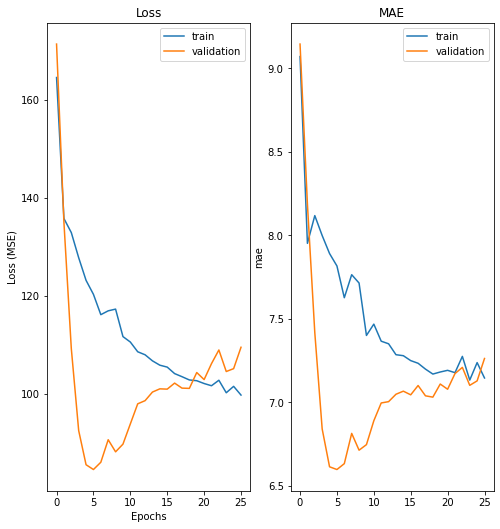

Min training Loss: 99.77973175048828
Min validation Loss:  84.59149932861328

Final training Loss: 99.77973175048828
Final validation Loss: 109.53189849853516

Min training MAE: 7.133835792541504
Min validation MAE:  6.598679065704346

Final training MAE: 7.146361351013184
Final validation MAE: 7.262956619262695


In [12]:
# Train
#Training with early stopping

t.tic() #Start timer
history = fit_model_es_checkpoint(X_train, y_train, learning_rate, num_epochs, batch_size, model)
t.toc() #Time elapsed since t.tic()

# Visualization
train_val_plot(history)

# Testing the model
As long as two models share the same architecture you can share weights between them. So, when restoring a model from weights-only, create a model with the same architecture as the original model and then set its weights.

In [18]:
# Define the model
model = design_model(n_steps, learning_rate, n_features)
model.summary()

Model: "Multivariate-CNN-model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 24, 8)             112       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 12, 8)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 97        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [19]:
folder_models = "Trained_Models"
file_path = str(os.getcwd()) + "/" + folder_models 
file_pre = "/U_Weights_{}*".format(name_prefix)

weights_files = list(glob.glob(file_path + file_pre))
weights_files.sort()

weights_files = [f[len(file_path)+1:] for f in weights_files]

In [20]:
folder_models + "/" + weights_files[0]

'Trained_Models/U_Weights_Multivariate-CNN_-109.26953--003.hdf5'

In [21]:
print("Loaded file:", weights_files[0])

# Choosing the best checkpoint (lowest error)
weights_file = "Trained_Models/U_Weights_Multivariate-CNN_-84.59150--006.hdf5" # folder_models + "/" + weights_files[0] 

# Loading it
model.load_weights(weights_file) 

Loaded file: U_Weights_Multivariate-CNN_-109.26953--003.hdf5


In [22]:
tmp_df = pd.DataFrame(testing_evaluation(X_test, y_test, model), index=[0])
tmp_df.insert(0, "Model", name_prefix.replace("-", " "), True)
tmp_df

,Model,RMSE,MAE,MAPE,R^2,Max Error
0,Multivariate CNN,16.062794,11.607689,3.823807e+15,0.13964,88.731783


# Sources
* https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
* https://www.tensorflow.org/tutorials/keras/save_and_load